In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, HDBSCAN
from umap import UMAP
from scipy.integrate import simpson
import zipfile
import polars as pl

from src.GaussianMixture import gaussian_mixture

PATH_DATA = 'src/Dataset/Data_Ottawa/data.zip'
PATH_RESULTS = 'src/Results_Noise'

# Import Data

In [2]:
# !cd 'src/Dataset/Data_Ottawa' && zenodo_get 'https://doi.org/10.5281/zenodo.14042152'

In [3]:
archive = zipfile.ZipFile(PATH_DATA, 'r')

data = pl.read_csv(
   archive.read('data/Noise.csv'), 
   has_header = False, 
   separator = ","
).to_numpy()

In [4]:
data.shape

(200000, 50)

### UMAP

In [5]:
emb = UMAP(
   n_components = 2,
   random_state = 42
).fit_transform(data)
np.save(f'{PATH_RESULTS}/emb_UMAP.npy', emb)
emb = np.load(f'{PATH_RESULTS}/emb_UMAP.npy')

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


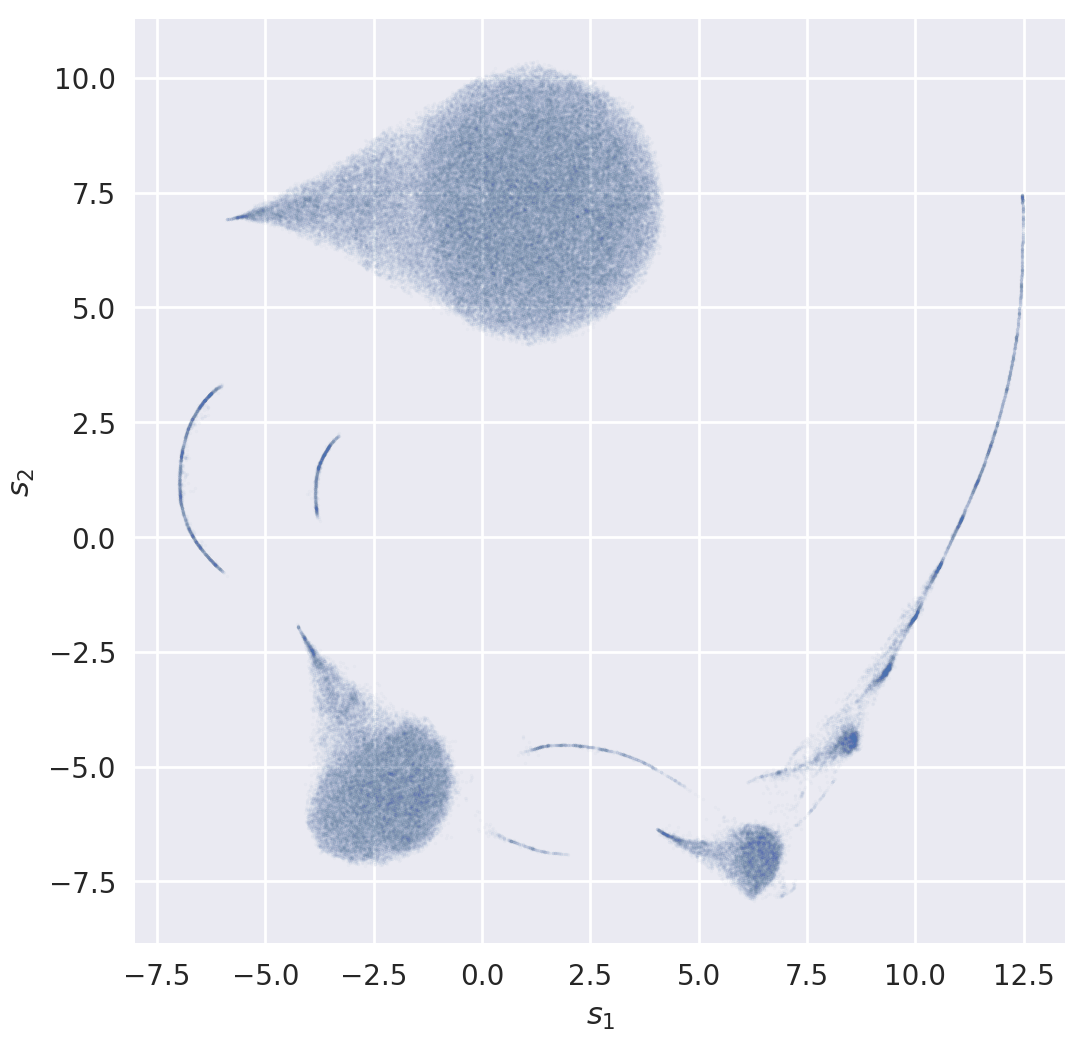

In [ ]:
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,6), dpi=100)
    plt.scatter(emb[:,0], emb[:,1], s=1, alpha=0.02)
    plt.xlabel(r'$s_1$')
    plt.ylabel(r'$s_2$')
    # plt.show()
    plt.savefig(f'{PATH_RESULTS}/noiseUMAP.png', format='png', bbox_inches='tight')

In [7]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data,
                      number_cluster = 2,
                      cluster_iter = 1,
                      means_init = None,
                      tol = 1e-1,
                      width_plot = 8,
                      height_plot = 6)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


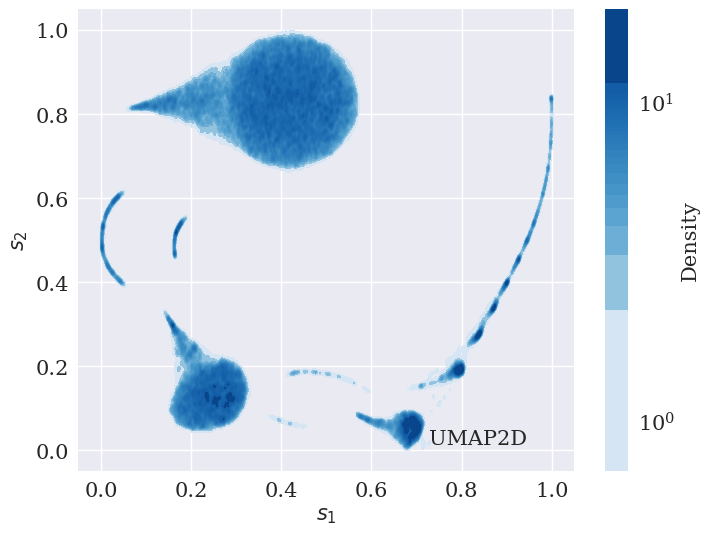

In [8]:
gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = False,
                text = "UMAP2D",
                save_path = PATH_RESULTS,
                cluster_number = False)

In [9]:
db = HDBSCAN(
   min_cluster_size=50,
   min_samples=None,
   cluster_selection_epsilon=0.14,
   max_cluster_size=None,
   metric='euclidean',
   metric_params=None,
   alpha=1.0,
   algorithm='auto',
   leaf_size=40,
   n_jobs=None,
   cluster_selection_method='eom'
)
labels = db.fit_predict(emb)
np.save(f'{PATH_RESULTS}/labels_UMAP.npy', labels)

/tmp/ipykernel_644109/3069588768.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(emb[condition,0], emb[condition,1], alpha=0.05, s=1, c=next(color))


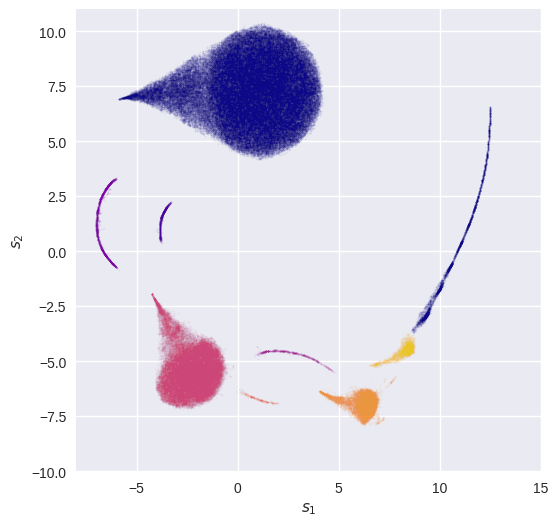

In [10]:
labels = np.load(f'{PATH_RESULTS}/labels_UMAP.npy')
color = iter(cm.plasma(np.linspace(0, 1, 9)))
with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(6,6))
    for i in range(10):
        if i == 7:
            continue
        if i % 9 == 0:
            color = iter(cm.plasma(np.linspace(0, 1, 9)))
        condition = labels == i
        plt.scatter(emb[condition,0], emb[condition,1], alpha=0.05, s=1, c=next(color))

    plt.xlabel(r'$s_1$')
    plt.ylabel(r'$s_2$')
    plt.ylim((-10,11))
    plt.xlim((-8,15))
    plt.savefig(f'{PATH_RESULTS}/scatterNoiseUMAP.png', format='png', bbox_inches='tight')
    plt.show()

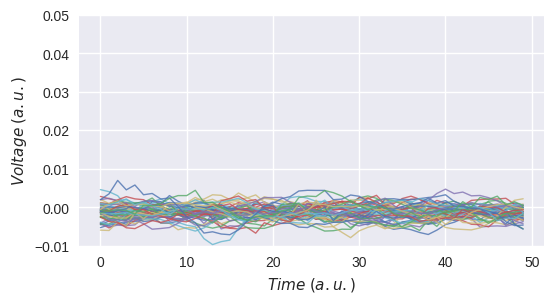

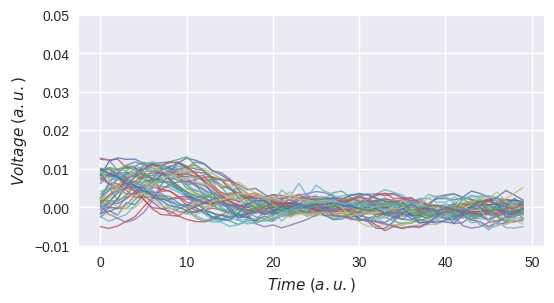

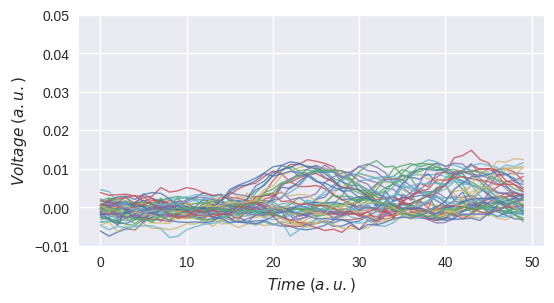

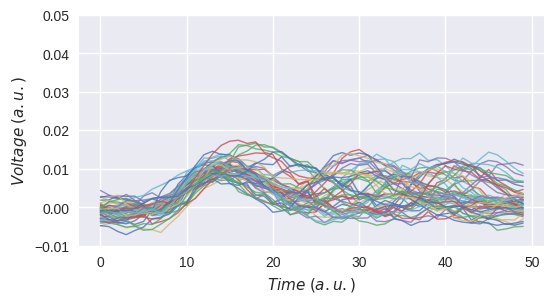

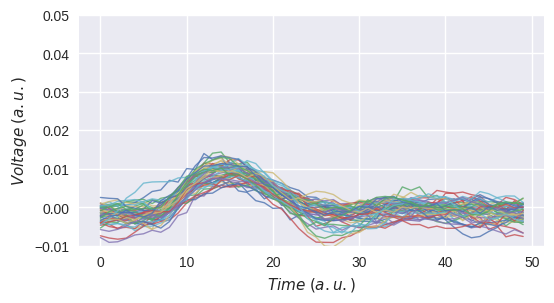

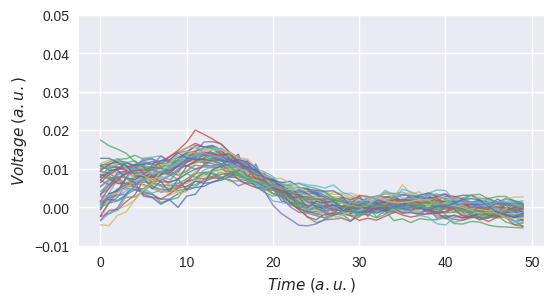

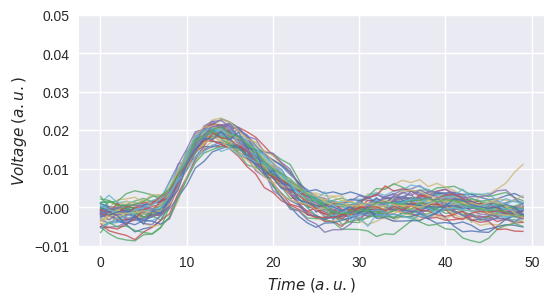

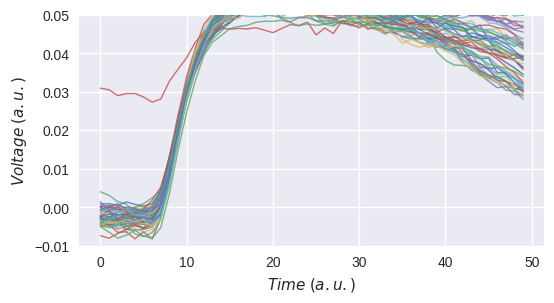

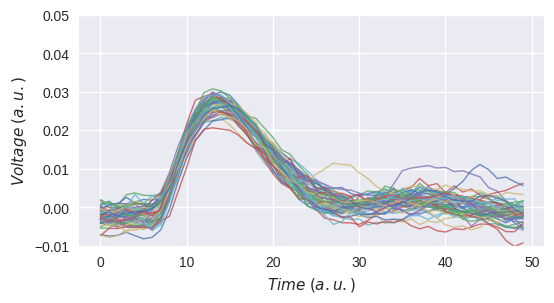

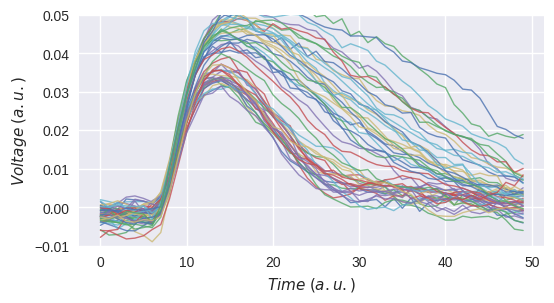

In [11]:
with plt.style.context("seaborn-v0_8"):
    for i in range(10):
        condition = labels == i
        data_ = data[condition,:]
        plt.figure(figsize=(6,3))
        plt.plot(data_[:np.min([data_.shape[1], 3000]),:].T, alpha=0.8, linewidth=1)#, c=color[i])
        plt.ylabel(r'$Voltage$ $(a.u.)$')
        plt.xlabel(r'$Time$ $(a.u.)$')
        plt.ylim((-0.01, 0.05))
        plt.savefig(f'{PATH_RESULTS}/ClusterUMAP/cluster{i}.pdf', format='pdf', bbox_inches='tight')
        plt.show()

### PCA 

In [12]:
emb = PCA(n_components=2).fit_transform(data)
np.save(f'{PATH_RESULTS}/emb_PCA2D.npy', emb)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


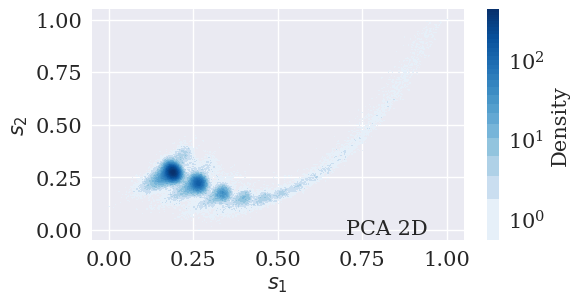

In [13]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data,
                      number_cluster = 28,
                      cluster_iter =1,
                      means_init = None,
                      tol = 1e-1,
                      width_plot = 6,
                      height_plot = 3)
gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = False,
                text = "PCA 2D",
                save_path = PATH_RESULTS,
                cluster_number = False)

In [14]:
emb = PCA(n_components=1).fit_transform(data)
np.save(f'{PATH_RESULTS}/emb_PCA1D.npy', emb)

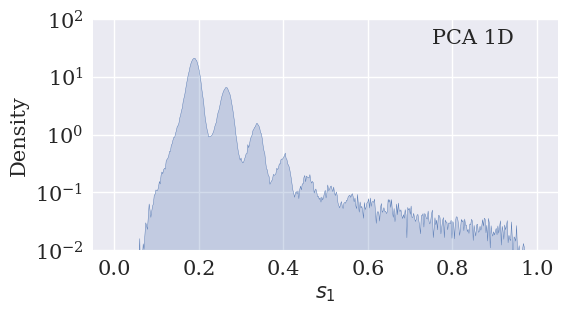

In [15]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data,
                      number_cluster = 28,
                      cluster_iter = 5,
                      means_init = None,
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 3)
gm.plot_density(bw_adjust = 0.09,
                plot_gaussians = False,
                text = "PCA 1D",
                save_path = PATH_RESULTS,
                cluster_number = False)